Model Selection using K-fold and Stratified K-Fold validation techniques from KNN and SVM

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [2]:
df=pd.read_csv('titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [6]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [7]:
en= preprocessing.LabelEncoder()
df['Sex']= en.fit_transform(df['Sex'])
df['Embarked']= en.fit_transform(df['Embarked'])

In [8]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


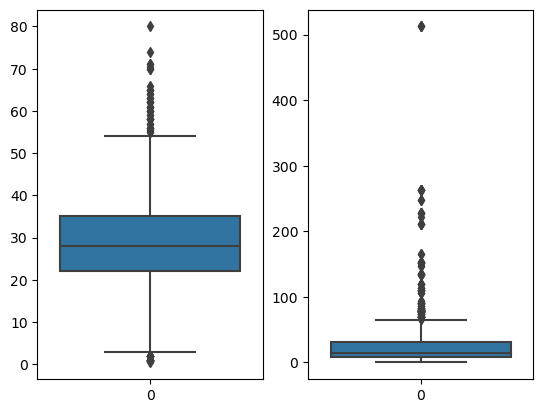

In [9]:
#Finding outliers
fig,axes = plt.subplots(1, 2)
sns.boxplot(ax=axes[0], data=df['Age'])
sns.boxplot(ax=axes[1], data=df['Fare'])
plt.show()

In [10]:
#removing outliers
Q1=df['Age'].quantile(0.25)
Q2=df['Age'].quantile(0.50)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
df['Age']=np.where(df['Age']>upp_lim,upp_lim,np.where(df['Age']<low_lim,low_lim,df['Age']))

Q1=df['Fare'].quantile(0.25)
Q2=df['Fare'].quantile(0.50)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
df['Fare']=np.where(df['Fare']>upp_lim,upp_lim,np.where(df['Fare']<low_lim,low_lim,df['Fare']))

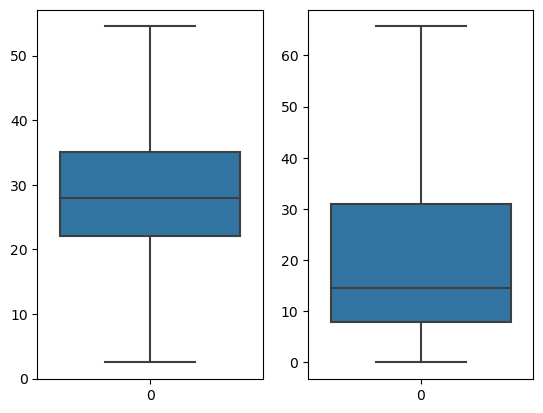

In [11]:
fig,axes = plt.subplots(1, 2)
sns.boxplot(ax=axes[0], data=df['Age'])
sns.boxplot(ax=axes[1], data=df['Fare'])
plt.show()

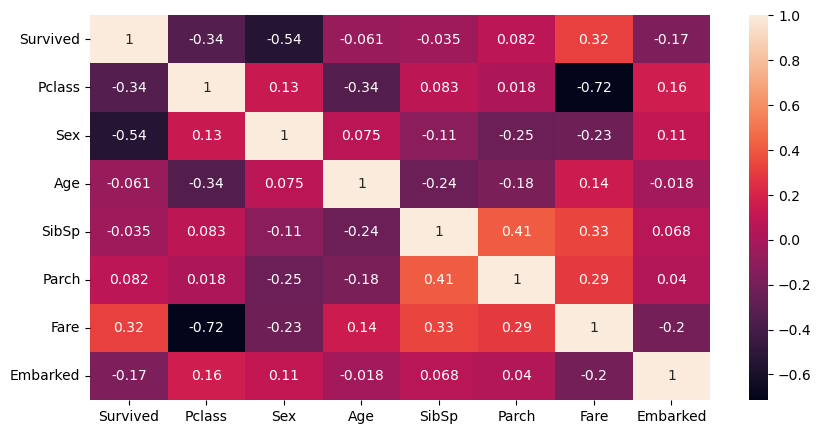

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Column 'Sex' has high negative correlation with 'Survived' and column 'Fare' with 'Pclass'

In [13]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.510371,0.065376,0.063599,0.366375,0.768238
std,0.418036,0.477990,0.232155,0.137843,0.134343,0.312056,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.375000,0.000000,0.000000,0.120522,0.500000
50%,1.000000,1.000000,0.490385,0.000000,0.000000,0.220223,1.000000
75%,1.000000,1.000000,0.625000,0.125000,0.000000,0.472313,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)
from sklearn.metrics import confusion_matrix,accuracy_score

K-Nearest Neighbors Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)
y_pred=kNN.predict(x_test)
print('accuracy is',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy is 0.8268156424581006
[[94 10]
 [21 54]]


Support Vector Machine Classifier

In [16]:
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred=svm_linear.predict(x_test)
print('accuracy is:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

accuracy is: 0.7877094972067039
[[88 16]
 [22 53]]


# K-Fold cross validation

In [17]:
from sklearn.model_selection import KFold
kf = KFold(10)

In [18]:
from sklearn.model_selection import cross_val_score
knn_res=cross_val_score(kNN,x,y,cv=kf)
knn_res

array([0.8       , 0.84269663, 0.76404494, 0.75280899, 0.80898876,
       0.84269663, 0.80898876, 0.79775281, 0.87640449, 0.7752809 ])

In [19]:
#Average of KNN using K-Fold
np.mean(knn_res)

0.8069662921348314

In [20]:
svm_res=cross_val_score(svm_linear,x,y,cv=kf)
svm_res

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [21]:
#Average of SVM using K-Fold
np.mean(svm_res)

0.786729088639201

# Stratified Cross Validation

In [22]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)

In [23]:
s_knn_res=cross_val_score(kNN,x,y,cv=skf)
s_knn_res

array([0.78888889, 0.84269663, 0.73033708, 0.7752809 , 0.84269663,
       0.82022472, 0.84269663, 0.79775281, 0.85393258, 0.79775281])

In [24]:
#Average of KNN using Stratified K-Fold
np.mean(s_knn_res)

0.8092259675405742

In [25]:
s_svm_res=cross_val_score(svm_linear,x,y,cv=skf)
s_svm_res

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [26]:
#Average of SVM using Stratified K-Fold
np.mean(s_svm_res)

0.786729088639201